<a href="https://colab.research.google.com/github/henryjonesinbaraj/Neural_Network_projects/blob/main/Assignement_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# Henry Jones Inbaraj C0863081
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df=pd.read_csv("Algerian_forest_fires_cleaned.csv")

# Data Preparation

In [28]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [29]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [30]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

# Data Cleaning

In [31]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [32]:
df['Classes'] = df['Classes'].apply(lambda x: x.strip()) # stripping spaces

In [33]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [34]:
df['Classes'] = df['Classes'].apply(lambda a:1 if a == 'fire' else 0 )  # changed to numerical data

In [37]:
df=df.drop(['day','month','year'], axis=1) # dropped unwanted data columns

In [38]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


<Axes: >

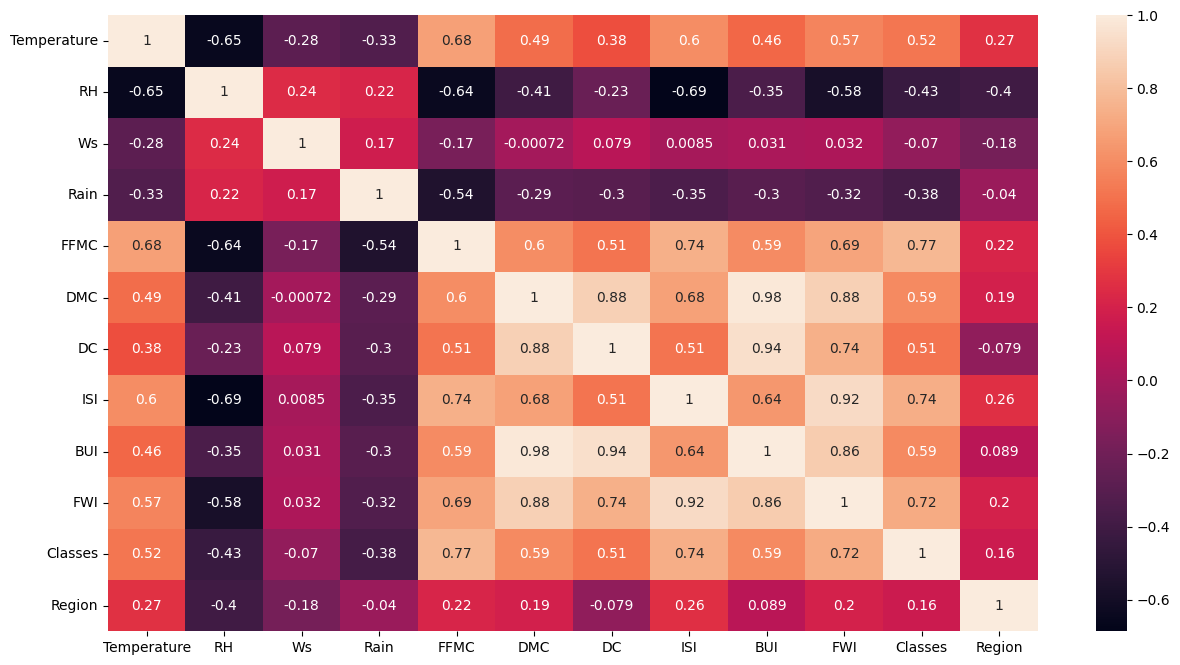

In [48]:
plt.figure(figsize=(15,8)). # correlation heat map
sns.heatmap(df.corr(), annot= True)

In [40]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


In [106]:
X=df.drop(['DMC','DC','FWI'],axis=1) # both are highly correlated, hence droped
y=df[['FWI']]


# test and train

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [108]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [109]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc=scaler.transform(X_test)

In [110]:
from pandas.core.reshape.api import lreshape
from sklearn.linear_model import LinearRegression

LR=LinearRegression()

In [111]:
LR.fit(X_train_sc, y_train)


LR.coef_

array([[-0.0883013 , -0.20552573, -0.12088421,  0.03721009, -0.88264838,
         5.18876745,  3.74242638,  0.25209186, -0.07468162]])

In [ ]:
LR.intercept_

In [125]:
y_pred=LR.predict(X_test_sc)
y_pred

array([[ 8.33540270e+00],
       [ 7.42148513e+00],
       [ 4.06793073e-02],
       [ 5.42889335e+00],
       [ 6.53498039e+00],
       [ 1.34973457e+00],
       [ 2.40257849e+00],
       [ 7.35362796e+00],
       [ 1.97689748e+00],
       [ 3.09783345e+00],
       [-1.48141138e-01],
       [ 6.95088793e+00],
       [ 9.62298613e+00],
       [ 1.61300814e+01],
       [ 1.92614571e+01],
       [ 1.30205846e+00],
       [ 2.33005587e+00],
       [-4.09785478e-02],
       [ 6.60483197e+00],
       [ 3.23934663e+00],
       [ 1.17152031e+00],
       [ 2.31707453e-01],
       [ 6.44654741e+00],
       [-2.01402904e-02],
       [ 2.11194869e+01],
       [ 4.80752475e+00],
       [ 5.84256808e+00],
       [ 9.99102220e+00],
       [ 3.23084104e-01],
       [ 9.69277748e+00],
       [ 6.16479905e+00],
       [ 6.06941709e-02],
       [ 1.02127937e+01],
       [ 1.51327806e+01],
       [ 1.25601724e+00],
       [ 7.41146557e-01],
       [ 1.79125456e+00],
       [ 6.14149427e+00],
       [-2.5

# Metrics

In [113]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("R2:",r2_score(y_test,y_pred))

MAE: 0.4342430115498613
MSE: 0.3553704740003781
R2: 0.9882748603682521


# Pickle

In [114]:
import pickle
pickle.dump(LR,open("LR_model.pkl",'wb'))
pickle.dump(scaler,open("scaler_model.pkl",'wb'))


In [115]:
model_LR=pickle.load(open("LR_model.pkl",'rb'))
model_scaler=pickle.load(open("scaler_model.pkl",'rb'))

In [116]:
X_New= pd.DataFrame({'Temperature':[23,24,45],
                     'RH':[35,46,78],
                     'Ws':[6,25,15],
                     'Rain':[2.0,8.1,9.1],
                     'FFMC':[28.9,90.0,34.7],
                     'ISI':[1.0,15.00,67.00],
                    'BUI':[1.5,55.00,56.00],
                     'Classes':[0,1,0],
                     'Region':[0,1,1]})

In [123]:
X_new_sc=model_scaler.transform(X_New)
X_new_sc

array([[-2.5222163 , -1.78828265, -3.65738954,  0.58013348, -3.49305563,
        -0.9121807 , -1.05374721, -1.14434427, -1.01036297],
       [-2.24778559, -1.05439896,  3.56722881,  3.50901554,  0.84500143,
         2.32720579,  2.50260251,  0.8738629 ,  0.98974332],
       [ 3.5152594 ,  1.0805354 , -0.2352019 ,  3.98916014, -3.08125971,
        14.35921273,  2.56907633, -1.14434427,  0.98974332]])

In [136]:
y_new_pred=model_LR.predict(X_new_sc)
y_new_pred

array([[ 2.6675143 ],
       [28.37631497],
       [93.54296063]])

Pickle is used to load the model and resuse it later purposes . no need to do the model again and again.

# Conclusion

In this analysis, I conducted an exploration of the dataset related to Algerian forest fires, followed by preprocessing and modeling tasks. My primary objective was to predict the Fire Weather Index (FWI) based on various environmental features.

Data Preparation and Cleaning
I began by loading and exploring the dataset, checking for missing values and gaining an initial understanding of the data.

I cleaned the 'Classes' column, which represents fire occurrence, by stripping spaces and converting class labels to numerical values (0 for no fire and 1 for fire).

I also dropped redundant columns such as 'day,' 'month,' and 'year' since they didn't significantly contribute to the analysis.

Model Building and Evaluation
I developed a Linear Regression model to predict the Fire Weather Index (FWI) based on the remaining environmental features.

After splitting the dataset into training and testing sets, I standardized the features using StandardScaler.

Subsequently, I trained and evaluated the model using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) on the test data.

The model's performance on the test data demonstrated promising results, with metrics indicating how well it fits the data.

Recommendation:

Logistic regression cannot be applied because our target variable is not categorical

Ridge regression is a solution to handle multicolinearity by reducing coefficent of correlated features. since our dataset has some multincolinearity. ridge regression might rpoduce a better model.

Lasso will address both multicolinearity and feature selection problem.

My recommedation would be ridge regression for this data set to give a better model.

